In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB

#LabelEncoder : ?
#MultinomiaNB : ?

penguins = sns.load_dataset("penguins")
penguins.columns = penguins.columns.str.replace("_mm","").str.replace("_g","")


## Sample Distribution

### massing values
- Missing value
 - Null drop?
 - Average?
- Imputation

In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         344 non-null    object 
 1   island          344 non-null    object 
 2   bill_length     342 non-null    float64
 3   bill_depth      342 non-null    float64
 4   flipper_length  342 non-null    float64
 5   body_mass       342 non-null    float64
 6   sex             333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
missing_index = penguins.isna().any(axis=1)
penguins[missing_index]

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [6]:
# 3과 339는 전체가 비어있으므로 없앤다..
penguins.drop([3,339],0,inplace=True)
penguins

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# Categorical Variables 범주형 데이터

- Column 데이터별 자료의 구성 종류를 보여준다

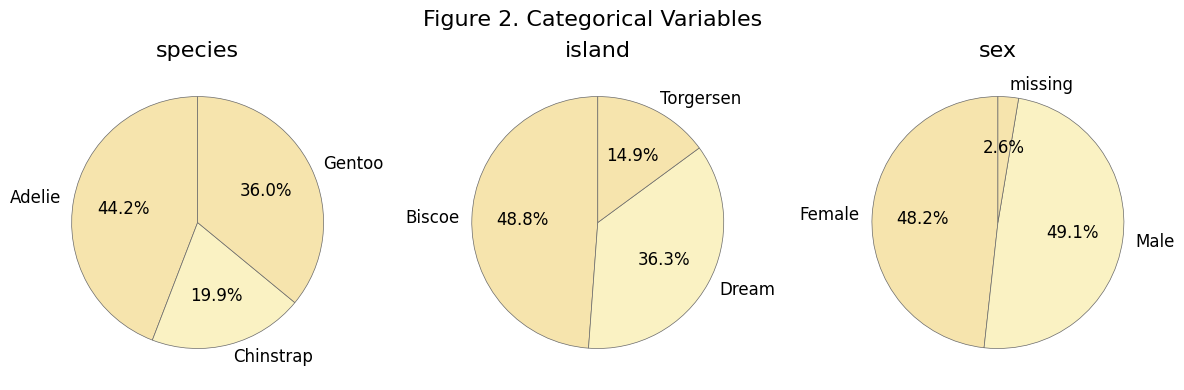

In [7]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
ax=ax.flatten()

for i,var in enumerate(['species','island','sex']):
    unique, counts = np.unique(penguins.loc[:,var].replace(np.nan,"missing"), return_counts=True)
    #return_counts:True : 
    ax[i].pie(counts, labels = unique, autopct='%.1f%%',
             colors = ["#F6E4AD","#FAF2C3"],
             startangle= 90, textprops={'fontsize':12},
              wedgeprops={"edgecolor":"dimgray","linewidth":.5})
    ax[i].set_title(f'{var}',fontsize=16)
              
plt.suptitle("Figure 2. Categorical Variables",fontsize=16)
plt.tight_layout()

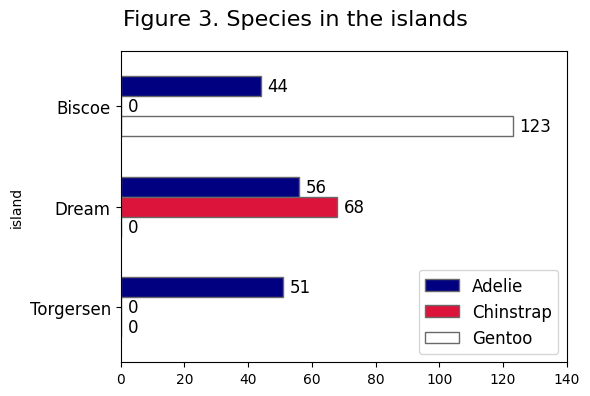

In [8]:
fig, ax = plt.subplots(figsize=(6,4))

island = penguins[['island','species']]
table = island.pivot_table(index='island',columns='species',
                          values='species',aggfunc='size')
table.replace(np.nan,0).plot(kind='barh',width=0.6,
                            color={'Adelie':'navy','Chinstrap':'crimson','Gentoo':'white'},
                            edgecolor='dimgray',ax=ax)
ax.invert_yaxis()
ax.set_xlim([0,140])
plt.yticks(fontsize=12)

for container in ax.containers:
    ax.bar_label(container, padding=5,fontsize=12)
ax.legend(fontsize=12)

fig.suptitle('Figure 3. Species in the islands',fontsize=16)
fig.tight_layout()

# Numerical Variables 수치형 데이터

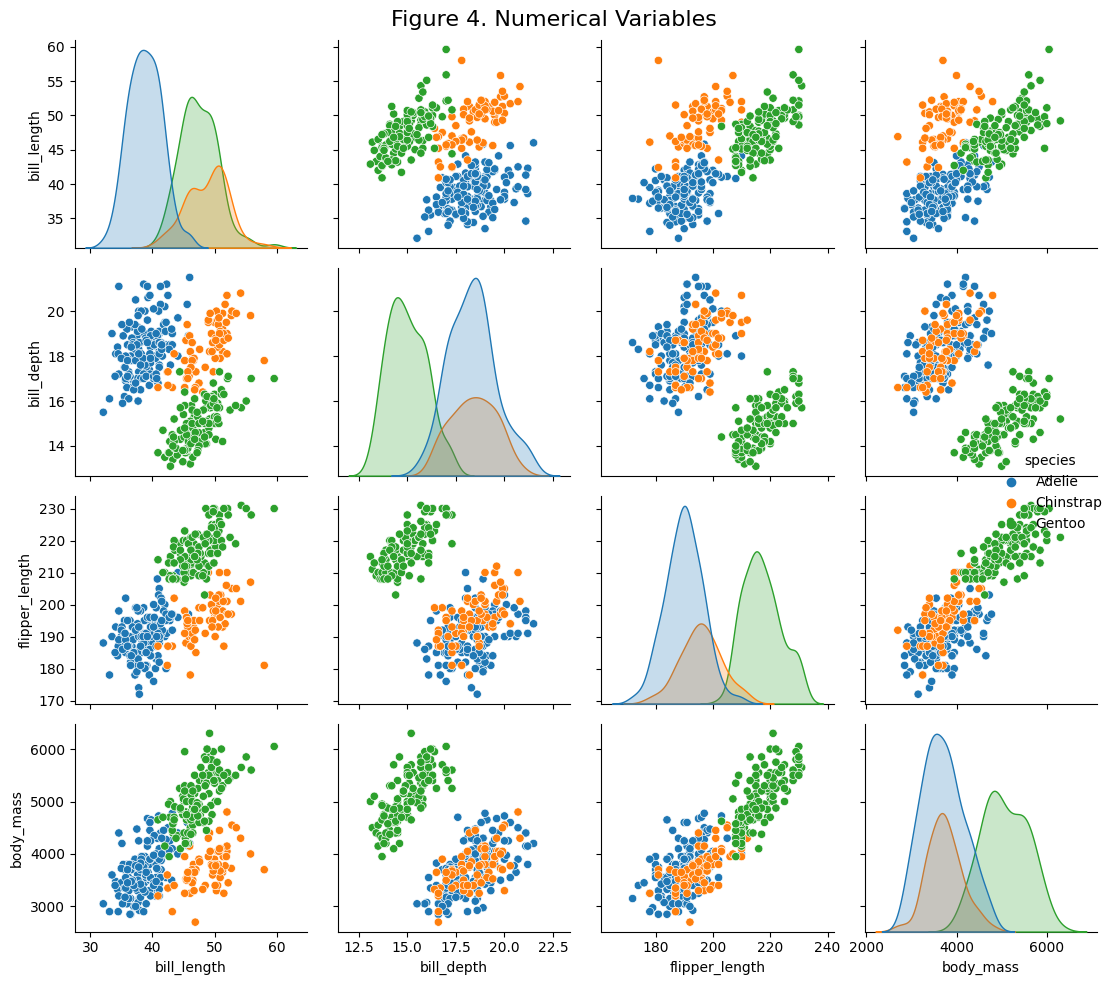

In [9]:
ax = sns.pairplot(penguins, hue="species",corner=False)
plt.suptitle("Figure 4. Numerical Variables",fontsize=16)
plt.tight_layout()
sns.reset_orig()

# MICE (Multiple Imputation by Chained Equations)

- Missing value logistic regression
 1. Missing
 2. Missing Vlaue
- Training
 - logistic regression impuation
 - imputated data

In [10]:
missing_index = penguins.isna().any(axis=1)
penguins[missing_index]

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [11]:
import statsmodels.api as sm

penguins_copy = pd.get_dummies(penguins, prefix = '', prefix_sep='',drop_first=True)
#get_dummies를 함으로써 범주형 -> 수치형으로 변환. drop first를 통해 Column이 너무 많아지지 않도록 조정
x = penguins_copy[~missing_index]
y = x.pop('Male')#Female은 없기 때문에 성별정보 제거

logit_imputation = sm.Logit(y, sm.add_constant(x)).fit()
sex_pred = logit_imputation.fittedvalues >= 0
print(f'nobs:{len(y)}, false positive:{(y<sex_pred).sum()}, false negative:{(y>sex_pred).sum()}')


Optimization terminated successfully.
         Current function value: inf
         Iterations 9
nobs:333, false positive:12, false negative:13


In [12]:
# logit impuation 을 통해 sex 결손치 매우기.

sex_imputed = logit_imputation.predict(sm.add_constant(penguins_copy[missing_index]).iloc[:,:-1])
sex_imputed = ['Male' if x>0.5 else 'Female' for x in sex_imputed]
# 왜 0.5보다 크면 Male로 되는지
# -> Male를 1로 fitting 시키기 때문.

print('imputed values')
print(pd.Series(sex_imputed).value_counts())

penguins_imputed = penguins.copy()
penguins_imputed.loc[missing_index, 'sex']=sex_imputed

#

imputed values
Female    8
Male      1
dtype: int64


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

y_imputed = penguins_imputed.pop("species")
x_imputed = pd.get_dummies(penguins_imputed, drop_first=True,prefix='',prefix_sep='')

le_imputed = LabelEncoder()
y_imputed = le_imputed.fit_transform(y_imputed)

x_train, x_test, y_train, y_test = train_test_split(x_imputed,y_imputed,test_size=.4)


In [14]:
# VIF Function
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(features):
    features = sm.add_constant(features)
    features.dropna(inplace=True)
    
    vif=pd.DataFrame([variance_inflation_factor(features.values,i)
                     for i in range(features.shape[1])],columns=['VIF'])
    vif.index = features.columns
    return vif


In [15]:
print('VIF')
vif(x_train)
#print(x_train)
#print('y_train')
#print(len(y_imputed))

VIF


,VIF
const,1215.705474
bill_length,2.218288
bill_depth,3.347366
flipper_length,6.105778
body_mass,6.814335
Dream,2.481403
Torgersen,1.829508
Male,2.480597


# Logistic regression

- Training set test set
 - Penalty

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.5573066277463289e-06
            Iterations: 50
            Function evaluations: 115
            Gradient evaluations: 50
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  205
Model:                        MNLogit   Df Residuals:                      189
Method:                           MLE   Df Model:                           14
Date:                Sun, 13 Nov 2022   Pseudo R-squ.:                   1.000
Time:                        23:25:13   Log-Likelihood:            -0.00031925
converged:                       True   LL-Null:                       -211.09
Covariance Type:            nonrobust   LLR p-value:                 2.669e-81
           y=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

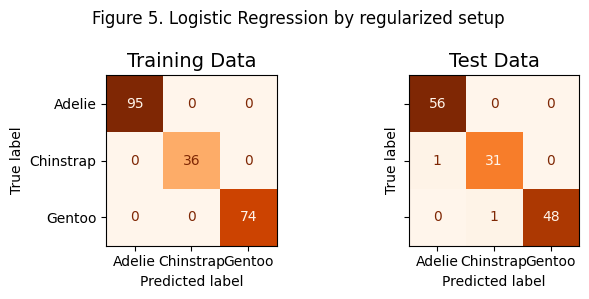

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
from statsmodels.discrete.discrete_model import MultinomialModel

mnlogit = sm.MNLogit(y_train, sm.add_constant(x_train))
mnlogit = mnlogit.fit_regularized()
print(mnlogit.summary())

fig, ax= plt.subplots(1,2,figsize=(7,3), sharey=True)

ConfusionMatrixDisplay.from_predictions(y_train, mnlogit.predict(sm.add_constant(x_train)).idxmax(1),
                                       colorbar=False, ax=ax[0],cmap=plt.cm.Oranges,
                                       display_labels=np.unique(le_imputed.inverse_transform(y_train)))
ax[0].set_title('Training Data',fontsize=14)

ConfusionMatrixDisplay.from_predictions(y_test, mnlogit.predict(sm.add_constant(x_test)).idxmax(1),
                                       colorbar=False, ax=ax[1],cmap=plt.cm.Oranges,
                                       display_labels=np.unique(le_imputed.inverse_transform(y_test)))
ax[1].set_title('Test Data',fontsize=14)

fig.suptitle("Figure 5. Logistic Regression by regularized setup")
fig.tight_layout()
plt.show()

# Regularized Logistic Regression

## L2 Ridge


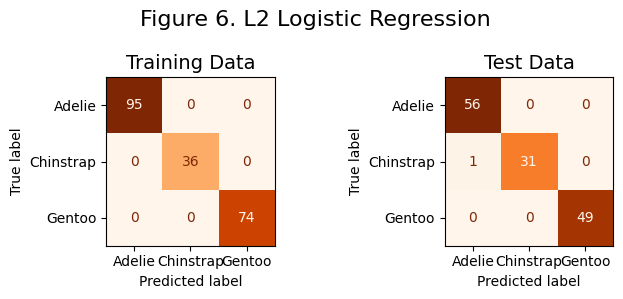

In [17]:
from sklearn.linear_model import LogisticRegression

multinomial = LogisticRegression(solver='lbfgs', max_iter=1000)
multinomial = multinomial.fit(x_train, y_train)

fig,ax=plt.subplots(1,2,figsize=(7,3))

ConfusionMatrixDisplay.from_predictions(y_train,multinomial.predict(x_train),
                                       colorbar=False, ax=ax[0], cmap=plt.cm.Oranges,
                                       display_labels=np.unique(le_imputed.inverse_transform(y_train)))

ConfusionMatrixDisplay.from_predictions(y_test,multinomial.predict(x_test),
                                       colorbar=False, ax=ax[1], cmap=plt.cm.Oranges,
                                       display_labels=np.unique(le_imputed.inverse_transform(y_test)))

ax[0].set_title("Training Data",fontsize=14)
ax[1].set_title("Test Data",fontsize=14)

fig.suptitle("Figure 6. L2 Logistic Regression", fontsize=16)
fig.tight_layout()
plt.show()

## L1 Lasso

- L1 LogisticRegression -> optimization algorithm
- GridSearchCV algorithm C
- scoring loss function

In [18]:
from sklearn.model_selection import GridSearchCV

cv=16
scoring = 'neg_log_loss' #efficient than 'accuracy'

C=np.logspace(-4,5,20)
solver = ['liblinear','saga']

# 'multinomial' is unavailable when solver = 'liblinear'
param_grid=[{"C":C, "solver":solver}]


gs= GridSearchCV(LogisticRegression(),param_grid=param_grid,cv=cv,
                scoring=scoring, return_train_score=True)

gs.fit(x_train,y_train)
#gs.cv_results_.keys()

GridSearchCV(cv=16, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 2.97635144e-04, 8.85866790e-04, 2.63665090e-03,
       7.84759970e-03, 2.33572147e-02, 6.95192796e-02, 2.06913808e-01,
       6.15848211e-01, 1.83298071e+00, 5.45559478e+00, 1.62377674e+01,
       4.83293024e+01, 1.43844989e+02, 4.28133240e+02, 1.27427499e+03,
       3.79269019e+03, 1.12883789e+04, 3.35981829e+04, 1.00000000e+05]),
                          'solver': ['liblinear', 'saga']}],
             return_train_score=True, scoring='neg_log_loss')

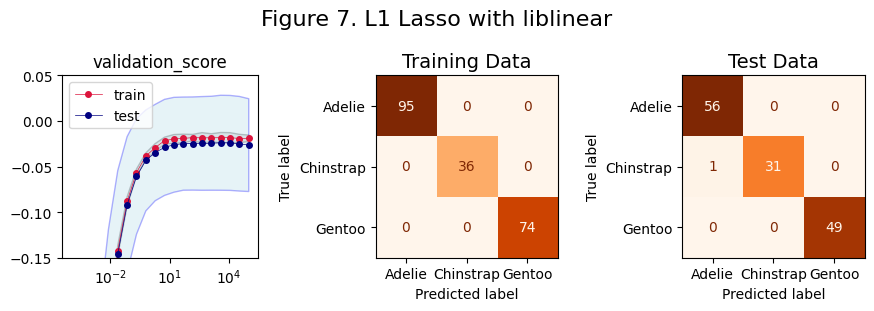

In [19]:
res = pd.DataFrame.from_dict(gs.cv_results_)

fig, ax = plt.subplots(1,3,figsize=(9,3))

#training data with liblinear
train_mean = res[res.param_solver=='liblinear']['mean_train_score']
train_std = res[res.param_solver=='liblinear']['std_train_score']

ax[0].plot(C,train_mean,'o-',label='train',color="crimson",lw=.5,markersize=4)
ax[0].fill_between(C, train_mean -1.96*train_std,train_mean+1.96*train_std,
                  color="lightgray",edgecolor="dimgray",alpha=.5,lw=1)

#test data with liblinear
test_mean = res[res.param_solver=='liblinear']['mean_test_score']
test_std = res[res.param_solver=='liblinear']['std_test_score']

ax[0].plot(C,test_mean,'o-',label='test',color="navy",lw=.5,markersize=4)
ax[0].fill_between(C, test_mean -1.96*test_std,test_mean+1.96*test_std,
                  color="lightblue",edgecolor="blue",alpha=.3,lw=1)

ax[0].set_xscale('log')
ax[0].set_ylim(-0.15,0.05)
ax[0].legend(loc='upper left')
ax[0].set_title('validation_score',fontsize=12)

ConfusionMatrixDisplay.from_predictions(y_train,multinomial.predict(x_train),
                                       colorbar=False, ax=ax[1], cmap=plt.cm.Oranges,
                                       display_labels=np.unique(le_imputed.inverse_transform(y_train)))

ConfusionMatrixDisplay.from_predictions(y_test,multinomial.predict(x_test),
                                       colorbar=False, ax=ax[2], cmap=plt.cm.Oranges,
                                       display_labels=np.unique(le_imputed.inverse_transform(y_test)))

ax[1].set_title("Training Data",fontsize=14)
ax[2].set_title("Test Data",fontsize=14)

#

fig.suptitle("Figure 7. L1 Lasso with liblinear", fontsize=16)
fig.tight_layout()
plt.show()

# Solver

- L1 penalty solver

In [20]:
cv=16
#scoring = 'neg_log_loss'

C=np.logspace(-4,5,20)
param_grid=[{"C":C}]

gs=GridSearchCV(LogisticRegression(solver='saga'),param_grid=param_grid,
               cv=cv,return_train_score=True)

gs.fit(x_train,y_train)

GridSearchCV(cv=16, estimator=LogisticRegression(solver='saga'),
             param_grid=[{'C': array([1.00000000e-04, 2.97635144e-04, 8.85866790e-04, 2.63665090e-03,
       7.84759970e-03, 2.33572147e-02, 6.95192796e-02, 2.06913808e-01,
       6.15848211e-01, 1.83298071e+00, 5.45559478e+00, 1.62377674e+01,
       4.83293024e+01, 1.43844989e+02, 4.28133240e+02, 1.27427499e+03,
       3.79269019e+03, 1.12883789e+04, 3.35981829e+04, 1.00000000e+05])}],
             return_train_score=True)

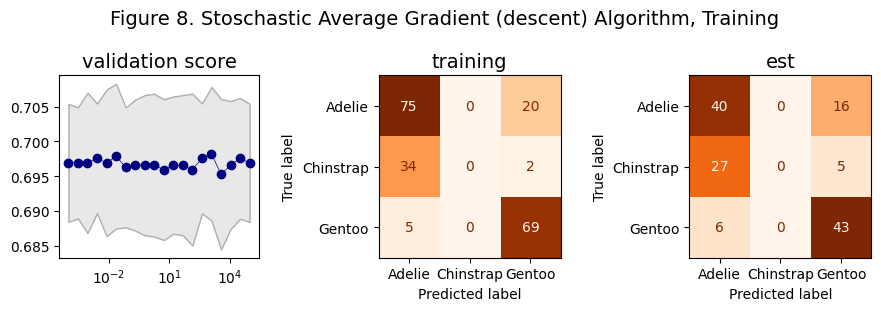

In [21]:
#training data with saga

fig, ax = plt.subplots(1,3,figsize=(9,3))

res_mean= gs.cv_results_['mean_train_score']
res_std= gs.cv_results_['std_train_score']

ax[0].plot(C,res_mean,'o-',label="validation score", color="navy", lw=.5)
ax[0].fill_between(C,res_mean-1.96*res_std,res_mean+1.96*res_std,
                  color="lightgray",edgecolor="dimgray",alpha=.5,lw=1)
ax[0].set_xscale('log')
ax[0].set_title("validation score",fontsize=14)

ConfusionMatrixDisplay.from_predictions(y_train,gs.predict(x_train),
                                       colorbar=False, ax=ax[1],cmap=plt.cm.Oranges,
                                       display_labels=np.unique(le_imputed.inverse_transform(y_test)))
ax[1].set_title("training",fontsize=14)

ConfusionMatrixDisplay.from_predictions(y_test,gs.predict(x_test),
                                       colorbar=False, ax=ax[2],cmap=plt.cm.Oranges,
                                       display_labels=np.unique(le_imputed.inverse_transform(y_train)))
ax[2].set_title("est",fontsize=14)

fig.suptitle("Figure 8. Stoschastic Average Gradient (descent) Algorithm, Training", fontsize=14)
fig.tight_layout()
plt.show()




In [23]:
np.unique(le_imputed.inverse_transform(y_train))

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [24]:
y_test

array([2, 1, 0, 2, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0,
       2, 0, 2, 1, 0, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0,
       1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 1, 0,
       1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 2, 0,
       2, 2, 2, 0, 1])